## Faster RCNN

In [107]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import cv2
import matplotlib.pyplot as plt

(-0.5, 2047.5, 1535.5, -0.5)

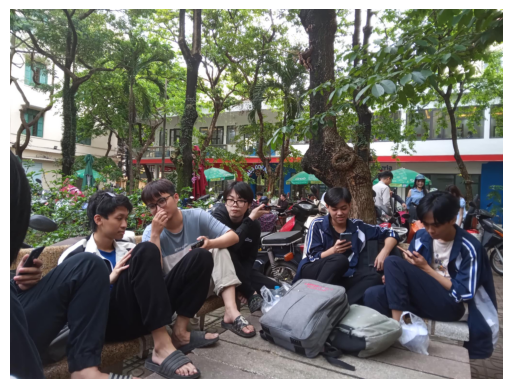

In [189]:
image_path = '../images/brothers.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')

In [193]:
image_tensor = torch.from_numpy(image)
image_tensor = image_tensor.permute(2, 0, 1).float() / 255.

In [195]:
detector = fasterrcnn_resnet50_fpn(pretrained=True)
detector.eval()

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [197]:
with torch.no_grad():
    results = detector([image_tensor])

In [198]:
predictions = results[0]
predictions

{'boxes': tensor([[1.1973e+03, 7.4347e+02, 1.6337e+03, 1.2271e+03],
         [1.5490e+03, 7.5076e+02, 2.0385e+03, 1.4756e+03],
         [7.8808e+02, 7.2918e+02, 1.0926e+03, 1.3472e+03],
         [1.8862e+03, 7.6313e+02, 2.0480e+03, 1.1203e+03],
         [6.8832e+01, 7.3472e+02, 7.8775e+02, 1.5173e+03],
         [1.5039e+03, 6.6947e+02, 1.6208e+03, 9.0807e+02],
         [5.5234e+02, 7.1036e+02, 1.0022e+03, 1.3799e+03],
         [0.0000e+00, 5.4427e+02, 8.7945e+01, 1.0958e+03],
         [1.1497e+03, 6.7400e+02, 1.3004e+03, 7.3229e+02],
         [1.3600e+03, 9.5490e+02, 1.4124e+03, 9.8149e+02],
         [7.9454e+02, 6.5637e+02, 9.3580e+02, 7.1523e+02],
         [1.6001e+03, 1.2529e+03, 1.7486e+03, 1.4416e+03],
         [1.8101e+03, 7.2468e+02, 1.8936e+03, 9.0462e+02],
         [1.0996e+03, 7.6727e+02, 1.1596e+03, 8.7232e+02],
         [1.1754e+01, 8.8138e+02, 4.5101e+02, 1.5137e+03],
         [1.0388e+03, 8.3266e+02, 1.2769e+03, 1.0866e+03],
         [1.3679e+03, 9.3071e+02, 1.4194e+03, 9

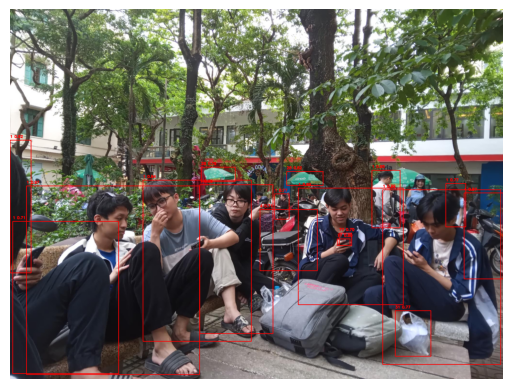

In [201]:
boxes = predictions['boxes']
scores = predictions['scores']
labels = predictions['labels']

for box, score, label in zip(boxes, scores, labels):
    if score > 0.7:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
        cv2.putText(image, f'{label.item()} {score:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

plt.imshow(image)
plt.axis('off')
plt.show()

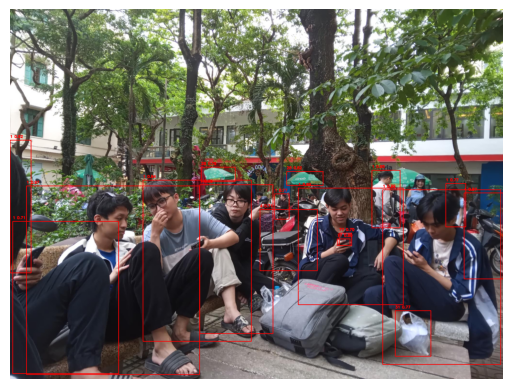

In [105]:
import cv2
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

# 1. Load Faster R-CNN pre-trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# 2. Đọc ảnh bằng OpenCV (BGR)
image_path = '../images/brothers.jpg'
image_bgr = cv2.imread(image_path)

# 3. Chuyển BGR -> RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 4. Tiền xử lý ảnh (normalize + to tensor)
transform = transforms.Compose([
    transforms.ToTensor()
])
image_tensor = transform(image_rgb)

# 5. Dự đoán với Faster R-CNN
predictions = model([image_tensor])[0]

# 6. Vẽ bounding box với confidence > 0.7
boxes = predictions['boxes']
scores = predictions['scores']
labels = predictions['labels']

for box, score, label in zip(boxes, scores, labels):
    if score > 0.7:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
        cv2.putText(image_rgb, f'{label.item()} {score:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# 7. Hiển thị ảnh với matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [185]:
torch.tensor(image).float() / 255.

tensor([[[0.3451, 0.3922, 0.3059],
         [0.3608, 0.4078, 0.3216],
         [0.3529, 0.4000, 0.3137],
         ...,
         [0.8157, 0.8471, 0.4431],
         [0.7725, 0.8000, 0.3843],
         [0.7176, 0.7490, 0.3137]],

        [[0.3255, 0.3725, 0.2863],
         [0.3373, 0.3843, 0.2980],
         [0.3294, 0.3765, 0.2902],
         ...,
         [0.8314, 0.8588, 0.4941],
         [0.7529, 0.7765, 0.3922],
         [0.6745, 0.7020, 0.2980]],

        [[0.3059, 0.3608, 0.2706],
         [0.3059, 0.3608, 0.2706],
         [0.3020, 0.3569, 0.2667],
         ...,
         [0.7961, 0.8196, 0.5294],
         [0.6784, 0.6980, 0.3765],
         [0.5765, 0.5961, 0.2667]],

        ...,

        [[0.8941, 0.9020, 0.9529],
         [0.8863, 0.9020, 0.9490],
         [0.8863, 0.9020, 0.9490],
         ...,
         [0.3412, 0.3020, 0.2941],
         [0.3412, 0.3020, 0.2941],
         [0.3451, 0.3059, 0.2980]],

        [[0.8902, 0.9020, 0.9608],
         [0.8902, 0.9020, 0.9608],
         [0.

In [179]:
transform(image)

tensor([[[0.3451, 0.3608, 0.3529,  ..., 0.8157, 0.7725, 0.7176],
         [0.3255, 0.3373, 0.3294,  ..., 0.8314, 0.7529, 0.6745],
         [0.3059, 0.3059, 0.3020,  ..., 0.7961, 0.6784, 0.5765],
         ...,
         [0.8941, 0.8863, 0.8863,  ..., 0.3412, 0.3412, 0.3451],
         [0.8902, 0.8902, 0.8863,  ..., 0.3373, 0.3373, 0.3412],
         [0.8902, 0.8902, 0.8824,  ..., 0.3373, 0.3373, 0.3373]],

        [[0.3922, 0.4078, 0.4000,  ..., 0.8471, 0.8000, 0.7490],
         [0.3725, 0.3843, 0.3765,  ..., 0.8588, 0.7765, 0.7020],
         [0.3608, 0.3608, 0.3569,  ..., 0.8196, 0.6980, 0.5961],
         ...,
         [0.9020, 0.9020, 0.9020,  ..., 0.3020, 0.3020, 0.3059],
         [0.9020, 0.9020, 0.8980,  ..., 0.2980, 0.2980, 0.3020],
         [0.9020, 0.9020, 0.9059,  ..., 0.2980, 0.2980, 0.2980]],

        [[0.3059, 0.3216, 0.3137,  ..., 0.4431, 0.3843, 0.3137],
         [0.2863, 0.2980, 0.2902,  ..., 0.4941, 0.3922, 0.2980],
         [0.2706, 0.2706, 0.2667,  ..., 0.5294, 0.3765, 0.